In [1]:
import numpy as np
import pandas as pd
from ggplot import mtcars
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
from ggplot import *
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sns

/Users/bryceeb/anaconda/envs/python35/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/bryceeb/anaconda/envs/python35/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/bryceeb/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Business Understanding


### Customer Churn Behavior Analysis

### Churn Prediction:
Customer churn refers to when a customer (player, subscriber, user, etc.) ceases their relationship with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. The full cost of customer churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reducing customer churn is a key business goal of every online business.

### Problem Statement & Hypothesis: 
The dataset I am going to use for churn analysis and prediction comes from an industry in which churn rates are particularly useful: telecommunications. Most customers have multiple options from which to choose within a geographic location. The objective of this excercise is to predict behavior to retain customers by analyzing all relevant customer data and develop focused customer retention programs.

Given what I currently know about the data plans/coverage, I believe someone with higher monthly costs will have a higher churn probality than someone who does not.

In [147]:
df = pd.read_csv('RS_Persona_Doc.csv')
df[:1]

,Persona,Gambling_Budget_(1_to_5),Experience_Budget_(1_to_5),How_much_would_you_be_willing_to_spend_on_your_hotel_room?_(1_to_5),How_much_would_you_be_willing_to_spend_on_food_and_beverage_during_your_trip?_(1_to_5),Are_celebrating_an_anniversary?_y_n,Are_you_here_for_business?_y_n,Are_you_interested_in_craft_beer?_y_n,Are_you_in_Las_Vegas_to_see_a_show?_y_n,Do_you_like_nightclubs?_y_n,...,Are_you_interested_in_visiting_local_nature_parks?_y_n,Are_coming_to_Las_Vegas_for_the_NCAA_March_Madness_Tournament?_y_n,Are_you_planning_a_wedding_in_Las_Vegas?_y_n,Are_you_here_to_for_a_21st_birthday?_y_n,Are_you_a_night_owl?_y_n,Do_you_use_social_media?_y_n,Are_you_flying_or_driving_to_Las_Vegas?_(Flying_Driving),Is_this_your_first_visit_to_Las_Vegas?_y_n,Are_you_a_Total_Rewards_member?_y_n,Are_you_interested_in_celebrity_chef_restaurants?_y_n
0,Bachelorette/Bachelor Party Goers,3,4,5,5,0,0,0,1,1,...,0,0,0,0,1,1,1,0,0,1


# Data Understanding


In [103]:
print ("Unique Customer Identifier: " + df.columns[0])
print ("---------------")
print ("Customer Features: " + str(list(df.columns[1:-1])))
print ("---------------")
print ("Target Variable: " + df.columns[-1])

Unique Customer Identifier: Persona
---------------
Customer Features: ['Gambling_Budget_(1_to_5)', 'Experience_Budget_(1_to_5)', 'How_much_would_you_be_willing_to_spend_on_your_hotel_room?_(1_to_5)', 'How_much_would_you_be_willing_to_spend_on_food_and_beverage_during_your_trip?_(1_to_5)', 'Are_you_here_for_business:_y_n', 'Are_you_in_Las_Vegas_to_see_a_show?_y_n', 'Do_you_like_nightclubs?_y_n', 'How_long_to_you_plan_on_staying_in_Las_Vegas_(days)?', 'What_day_of_week_do_you_plan_on_arriving?', 'Are_you_interested_in_seeing_attractions_off_The_Strip?_y_n', 'Are_you_interested_in_visiting_local_nature_parks?_y_n', 'Are_coming_to_Las_Vegas_for_the_NCAA_March_Madness_Tournament?_y_n', 'Are_you_planning_a_wedding_in_Las_Vegas?_y_n', 'Are_you_here_to_for_a_21st_birthday?_y_n', 'Are_you_a_night_owl?_y_n', 'Do_you_use_social_media?_y_n', 'Are_you_flying_or_driving_to_Las_Vegas?_(Flying_Driving)', 'Is_this_your_first_visit_to_Las_Vegas?_y_n', 'Are_you_a_Total_Rewards_member?_y_n']
------------

# Exploratory Data Analysis

## Investigation of Data Counts & Distributions

In [104]:
Churn = df.groupby(['Churn']).count()
Churn = Churn.reset_index()
Churn = Churn.sort_values(['customerID'], ascending= False)
sns.barplot(y="Churn", x="customerID", data=Churn).set_title("Customer Churn Counts of Dataset",fontsize=20)

KeyError: 'Churn'

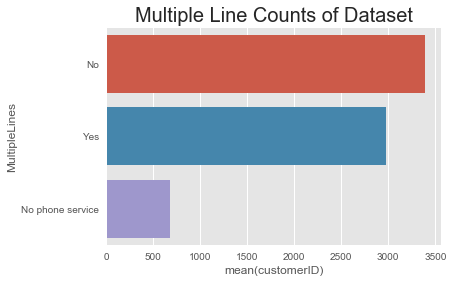

In [291]:
MultipleLines = df.groupby(['MultipleLines']).count()
MultipleLines = MultipleLines.reset_index()
MultipleLines = MultipleLines.sort_values(['customerID'], ascending= False)
sns.barplot(y="MultipleLines", x="customerID", data=MultipleLines).set_title("Multiple Line Counts of Dataset",fontsize=20)

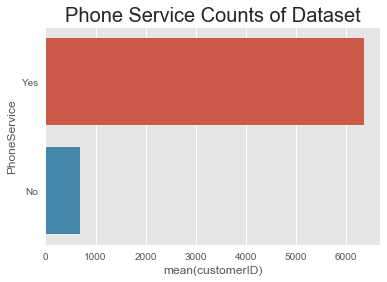

In [292]:
PhoneService = df.groupby(['PhoneService']).count()
PhoneService = PhoneService.reset_index()
PhoneService = PhoneService.sort_values(['customerID'], ascending= False)
sns.barplot(y="PhoneService", x="customerID", data=PhoneService).set_title("Phone Service Counts of Dataset",fontsize=20)

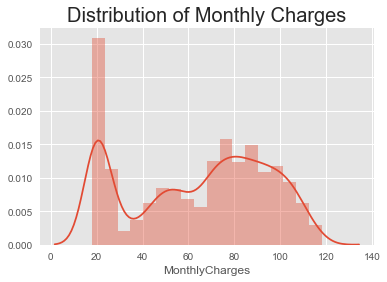

In [293]:
sns.distplot(df['MonthlyCharges']).set_title("Distribution of Monthly Charges",fontsize=20)

# Data Preparation


In [294]:
dtree = df[df.columns[1:]]
dtree = dtree.dropna()  
dtree_d = pd.get_dummies(dtree, columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

dtree_d["Churn"] = dtree_d["Churn"].astype('category')
dtree_d["Churn"] = dtree_d["Churn"].cat.codes
dtree_d = dtree_d.fillna(0)

In [295]:
dtree_d = dtree_d.astype(np.float16)

# Modeling Approaches


## Churn Prediction Exploration (Using a Simple Decision Tree) 

In [148]:
from sklearn.model_selection import train_test_split
from sklearn import tree

dtree_d = df.dropna()
X = dtree_d.drop('Persona',axis=1) 
y = dtree_d['Persona']

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

model = tree.DecisionTreeClassifier()

model.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [149]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [150]:
features = list(X.columns)

+ explain Gini for DS + Economics

In [151]:
visualize_tree(model, features)

<img src="decision_tree.png">

### Hypothesis Follow Up
In looking at the decision tree, it appears that if someone streams movies they are more likely to churn than any other feature, followed by DSL internet service. I hypothesized that the monthly charges would be the most important feature, but it appears this is incorrect. 

In [300]:
y_pred = model.predict(X_test)

In [301]:
y_pred

array([ 0.,  0.,  0., ...,  0.,  1.,  0.], dtype=float16)

In [302]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  74.5385707525


# Keras Binary Classifier Implementation

In [303]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [304]:
seed = 7
np.random.seed(seed)

In [305]:
y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)
X_train_nn = np.array(X_train)
X_test_nn = np.array(X_test)

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:
- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

In [306]:
model = Sequential()
model.add(Dense(12, input_dim=len(X.columns), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Binary Crossentropy: Cross entropy can be used to define the loss function in machine learning and optimization. The true probability  p is the true label, and the given distribution q is the predicted value of the current model. I use binary cross entropy as the loss function as this is a binary classification. 
    
Adam: Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds. Comparitively, Adam algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
    
ReLu: ReLU stands for Rectified Linear Unit and is a non-linear operation. The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.
Output = max(0, infinity) 
    
Sigmoid: The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In [307]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [321]:
model.fit(X_train_nn, y_train_nn, epochs=5, batch_size=1)

Epoch 1/5
4930/4930 [==============================] - 13s - loss: 0.5772 - acc: 0.7357    
Epoch 2/5
4930/4930 [==============================] - 13s - loss: 0.5771 - acc: 0.7357    
Epoch 3/5
4930/4930 [==============================] - 14s - loss: 0.5770 - acc: 0.7357    
Epoch 4/5
4930/4930 [==============================] - 13s - loss: 0.5867 - acc: 0.7357    
Epoch 5/5
4930/4930 [==============================] - 14s - loss: 0.5774 - acc: 0.7357    


In [309]:
scores = model.evaluate(X_test_nn, y_test_nn)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1984/2113 [===========================>..] - ETA: 0s
acc: 73.21%


# Evaluation and Results

The decision tree is more accurate than the binary classifier neural network by a margin of ~1%

In [310]:
scores = model.evaluate(X_nn, y_nn)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5632/7043 [======================>.......] - ETA: 0s
acc: 73.46%


In [320]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  74.5385707525


# Productionalizing Churn Modeling

Using the model developed here, it would be reccomended to productionalize this into a monthly or weekly score given to customer to arm customer service representatives with 'at-risk' accounts. However, since the decision tree was more accurate - I could supply the business rules from the decision tree to the business users. 

In [152]:
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

In [153]:
estimator = Id3Estimator(max_depth=50, min_samples_split=0, is_repeating=False, gain_ratio=True)

In [154]:
estimator.fit(X, y)

Id3Estimator(gain_ratio=True, is_repeating=False, max_depth=50,
       min_entropy_decrease=0.0, min_samples_split=0, prune=False)

In [155]:
export_graphviz(estimator.tree_, 'tree.dot', features)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [156]:
len(features)

22